In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, RFECV, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, Lasso,LassoCV)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.patches import mlines

## Data processing
First, we read the data from kc_house_data.csv and delete the unrelevant features. 

In [2]:
#read the data
data = pd.read_csv("./kc_house_data.csv")
data.head(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


id and data are not the relevant features to housing price, therefore, it is deleted. 

In [3]:
#delete unrelevant features: house id and date
data = data.drop(['id', 'date','lat','long','waterfront','zipcode'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503


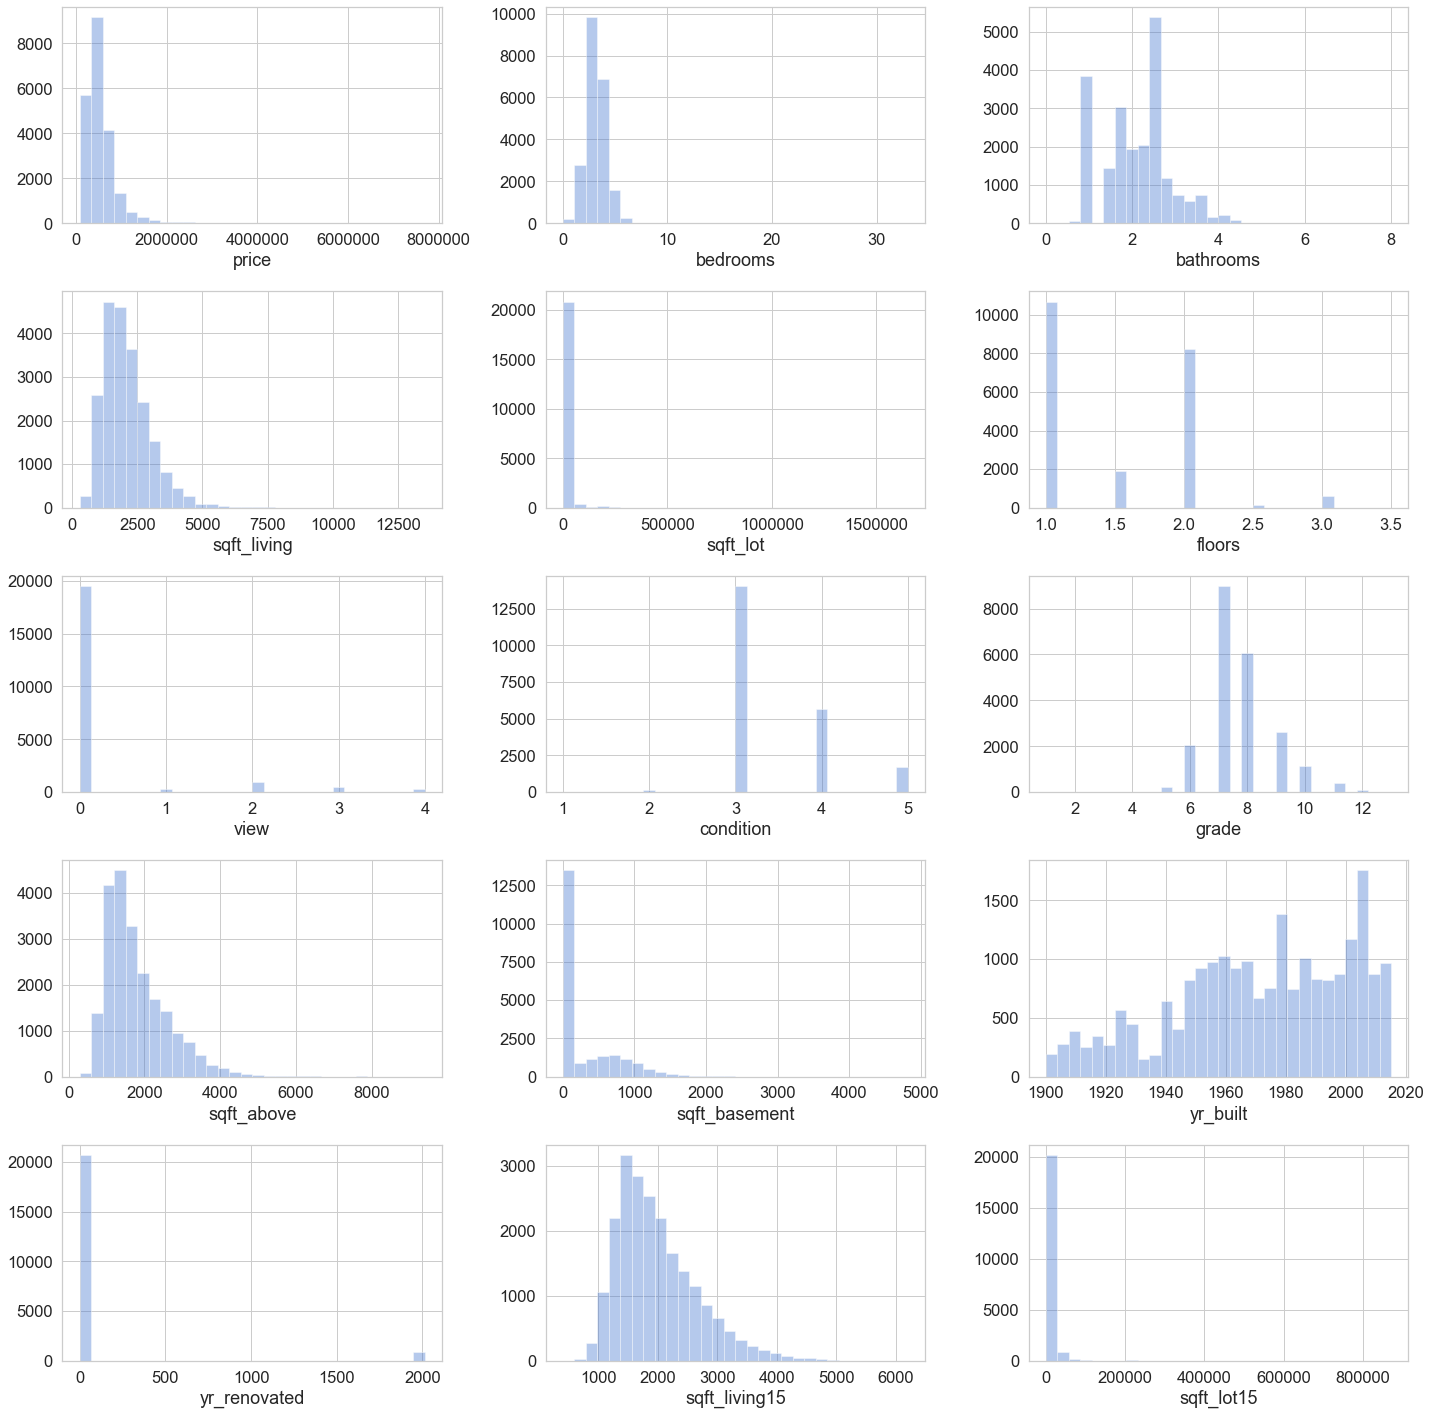

In [4]:
sns.set(style="whitegrid", palette="muted", font_scale = 1.5,color_codes=True)
f, axes = plt.subplots(5, 3, figsize=(20, 20))
for ax, feature in zip(axes.flat, data.columns):
    sns.distplot(data[feature], bins=30, kde = False, hist = True, color = 'b', ax=ax)
plt.tight_layout()
plt.show()

In [5]:
#Get the house price
y = data['price'].values
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
data = data.drop(['price'], axis=1)
x = data.values
# Store the column/feature names into a list "colnames"
colnames = data.columns

In [6]:
#split the data into training set and test set
train_size = np.round(x.shape[0] * 0.75).astype(np.int32)

x_train = x[0:train_size]
y_train = y[0:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

#1. Linear regression
Linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
LR_predict = Linear_regression.predict(x_test)

rmse = np.sqrt(np.mean(np.power(LR_predict-y_test,2)))
print("RMSE score for linear regression:", rmse)


#Polynomial regression with degree = 2
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

LR2 = LinearRegression(normalize = True).fit(x_train2,y_train)
LR2_predict = LR2.predict(x_test2)
rmse = np.sqrt(np.mean(np.power(LR2_predict-y_test,2)))
print("RMSE score for 2nd order polynomial regression:", rmse)


#Polynomial regression with degree = 3
poly = PolynomialFeatures(degree=3)
x_train3 = poly.fit_transform(x_train)
x_test3 = poly.fit_transform(x_test)

LR3 = LinearRegression(normalize = True).fit(x_train3,y_train)
LR3_predict = LR3.predict(x_test3)
rmse = np.sqrt(np.mean(np.power(LR3_predict-y_test,2)))
print("RMSE score for 3rd order Polynomial regression:", rmse)

RMSE score for linear regression: 225282.50322369806
RMSE score for 2nd order polynomial regression: 202315.58765207278
RMSE score for 3rd order Polynomial regression: 311367.46600180614


In [7]:
#2. Lasso regression
LassoReg = LassoCV(alphas = (5,10,20,50,100,200,500),cv = 5,normalize=True).fit(x_train,y_train)
Lasso_predict = LassoReg.predict(x_test)
rmse = np.sqrt(np.mean(np.power(Lasso_predict-y_test,2)))
print("RMSE score for Lasso regression:", rmse)

# Lasso: Polynomial regression with degree = 2
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
Lasso2 = LassoCV(alphas = (5,10,20,50,100,200,500),cv = 5,normalize=True).fit(x_train2,y_train)
Lasso2_predict = Lasso2.predict(x_test2)
rmse = np.sqrt(np.mean(np.power(Lasso2_predict-y_test,2)))
print("RMSE score for Lasso regression with 2nd order features:", rmse)


#Lassp: Polynomial regression with degree = 3
poly = PolynomialFeatures(degree=3)
x_train3 = poly.fit_transform(x_train)
x_test3 = poly.fit_transform(x_test)
Lasso3 = LassoCV(alphas = (5,10,20,50,100,200,500),cv = 5,normalize=True).fit(x_train3,y_train)
Lasso3_predict = Lasso3.predict(x_test3)
rmse = np.sqrt(np.mean(np.power(Lasso3_predict-y_test,2)))
print("RMSE score for Lasso regression with 3rd order features:", rmse)

RMSE score for Lasso regression: 225264.9880847942


C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705800451676.1875, tolerance: 170939600867.0722
  tol, rng, random, positive)
C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684421076836.0, tolerance: 173329608186.39062
  tol, rng, random, positive)
C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684064140335.9375, tolerance: 168214204592.36816
  tol, rng, random, positive)
C:\Users\xpeng76\

RMSE score for Lasso regression with 2nd order features: 205849.80850514222


C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2910173526063.875, tolerance: 170939600867.0722
  tol, rng, random, positive)
C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2006310289040.875, tolerance: 170939600867.0722
  tol, rng, random, positive)
C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199481954169.375, tolerance: 173329608186.39062
  tol, rng, random, positive)
C:\Users\xpeng76

RMSE score for Lasso regression with 3rd order features: 210309.34781783677


In [8]:
#3. Ridge regression
RidgeReg = RidgeCV(alphas=(0.02,0.05,0.1,0.15,0.2,0.5,1,1.0,2,5,10.0,20),normalize = True).fit(x,y)
Ridge_predict = RidgeReg.predict(x_test)
rmse = np.sqrt(np.mean(np.power(Ridge_predict-y_test,2)))
print("RMSE score for Ridge regression:", rmse)

# Ridge: Polynomial regression with degree = 2
poly = PolynomialFeatures(degree=2)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
Ridge2 = RidgeCV(alphas=(0.02,0.05,0.1,0.15,0.2,0.5,1,1.0,2,5,10.0,20),cv = 5,normalize=True).fit(x_train2,y_train)
Ridge2_predict = Ridge2.predict(x_test2)
rmse = np.sqrt(np.mean(np.power(Ridge2_predict-y_test,2)))
print("RMSE score for Ridge regression with 2nd order features:", rmse)


#Lassp: Polynomial regression with degree = 3
poly = PolynomialFeatures(degree=3)
x_train3 = poly.fit_transform(x_train)
x_test3 = poly.fit_transform(x_test)
Ridge3 = RidgeCV(alphas=(0.02,0.05,0.1,0.15,0.2,0.5,1,1.0,2,5,10.0,20),cv = 5,normalize=True).fit(x_train3,y_train)
Ridge3_predict = Ridge3.predict(x_test3)
rmse = np.sqrt(np.mean(np.power(Ridge3_predict-y_test,2)))
print("RMSE score for Ridge regression with 3rd order features:", rmse)

RMSE score for Ridge regression: 221166.27442798915
RMSE score for Ridge regression with 2nd order features: 206784.74003624788
RMSE score for Ridge regression with 3rd order features: 209284.01707014206


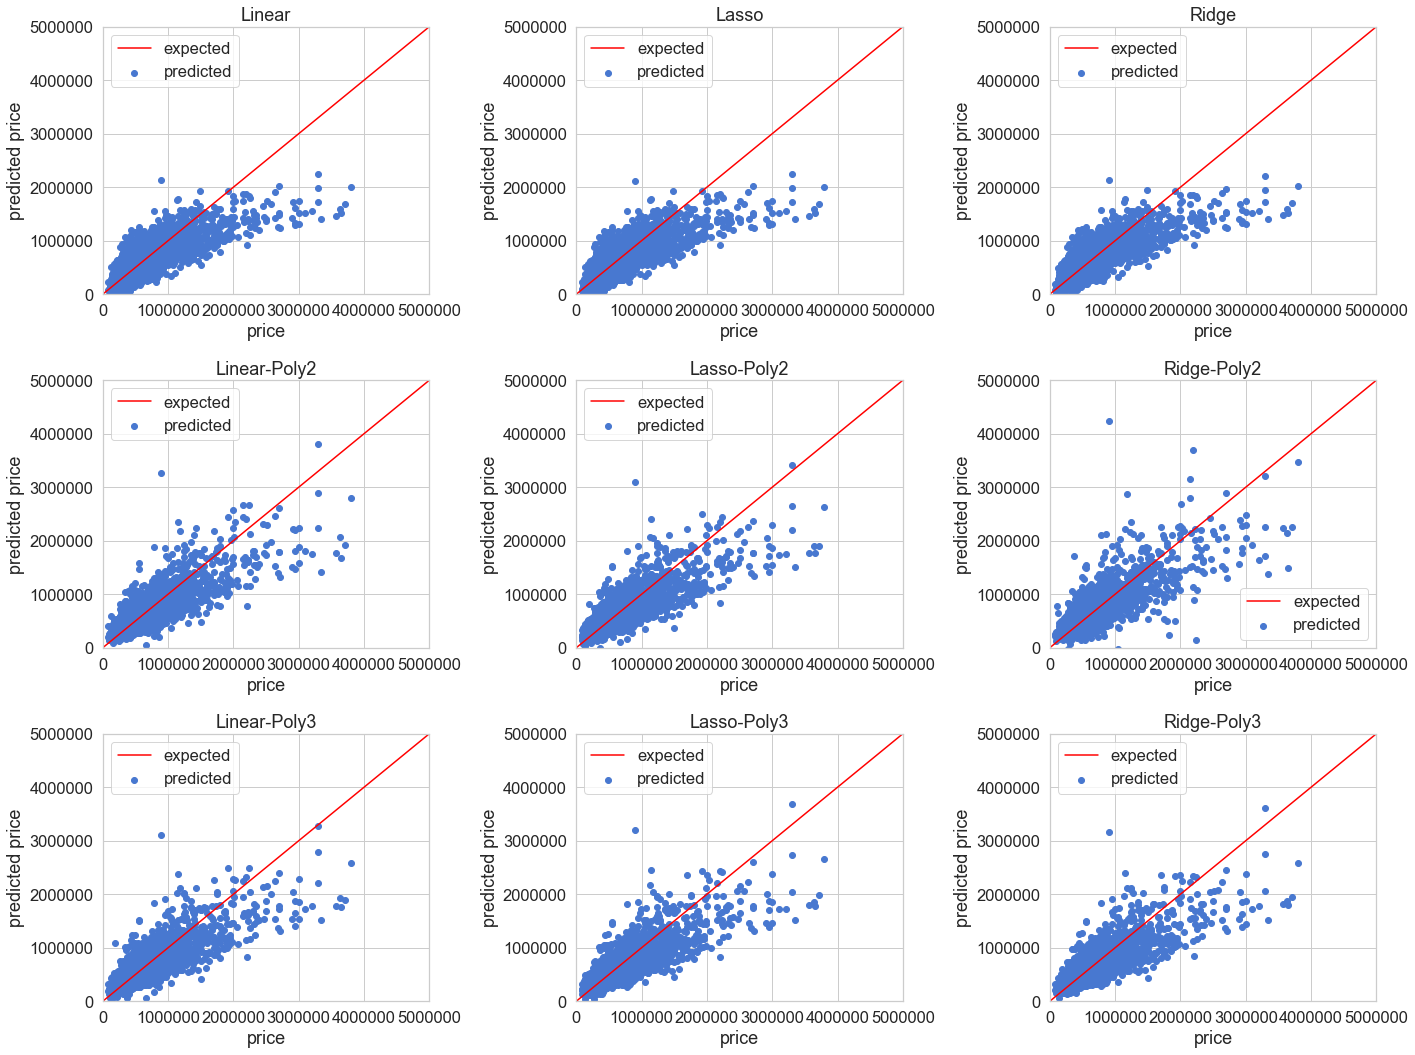

In [14]:
#plot figures
#scatter plot
predict_data = [LR_predict,Lasso_predict,Ridge_predict,LR2_predict,Lasso2_predict,LR3_predict,Ridge2_predict,Lasso3_predict,Ridge3_predict]
x_title = ['Linear','Lasso','Ridge','Linear-Poly2','Lasso-Poly2','Ridge-Poly2','Linear-Poly3','Lasso-Poly3','Ridge-Poly3']

f, axes = plt.subplots(3, 3,figsize=(20,15))
for ax, y_predict,title in zip(axes.flat, predict_data,x_title):
    line = mlines.Line2D([0,1],[0,1],color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.scatter(y_test,y_predict)
    ax.set_title(title)
    ax.add_line(line)
    ax.set_xlim(0,5000000)
    ax.set_ylim(0,5000000)
    ax.set_xlabel("price")
    ax.set_ylabel("predicted price")
    ax.legend(['expected','predicted'])
plt.tight_layout()
plt.show()

#bar plot

In [15]:
Linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
rfecv = RFECV(Linear_regression).fit(x_train,y_train)
print(rfecv.n_features_)
print(rfecv.ranking_)
print(rfecv.support_)
print(colnames)

13
[1 1 1 2 1 1 1 1 1 1 1 1 1 1]
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


C:\Users\xpeng76\AppData\Local\Continuum\anaconda3\envs\xpeng-python3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [16]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

ranks = {}
#Use linear regression as the estimator
Linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
#Do RFE until the desired number of features are selected
rfe = RFE(Linear_regression, n_features_to_select=5, verbose =3 )
rfe.fit(x,y)

rankings = rfe.ranking_.reshape(x.shape[1])
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [17]:
print(ranks["RFE"])
print(rankings)
print(colnames)

{'bedrooms': 0.67, 'bathrooms': 1.0, 'sqft_living': 0.56, 'sqft_lot': 0.0, 'floors': 0.89, 'view': 1.0, 'condition': 1.0, 'grade': 1.0, 'sqft_above': 0.33, 'sqft_basement': 0.44, 'yr_built': 0.78, 'yr_renovated': 1.0, 'sqft_living15': 0.22, 'sqft_lot15': 0.11}
[ 4  1  5 10  2  1  1  1  7  6  3  1  8  9]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [18]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	RFE	Mean
bedrooms	0.67	0.67
bathrooms	1.0	1.0
sqft_living	0.56	0.56
sqft_lot	0.0	0.0
floors	0.89	0.89
view	1.0	1.0
condition	1.0	1.0
grade	1.0	1.0
sqft_above	0.33	0.33
sqft_basement	0.44	0.44
yr_built	0.78	0.78
yr_renovated	1.0	1.0
sqft_living15	0.22	0.22
sqft_lot15	0.11	0.11


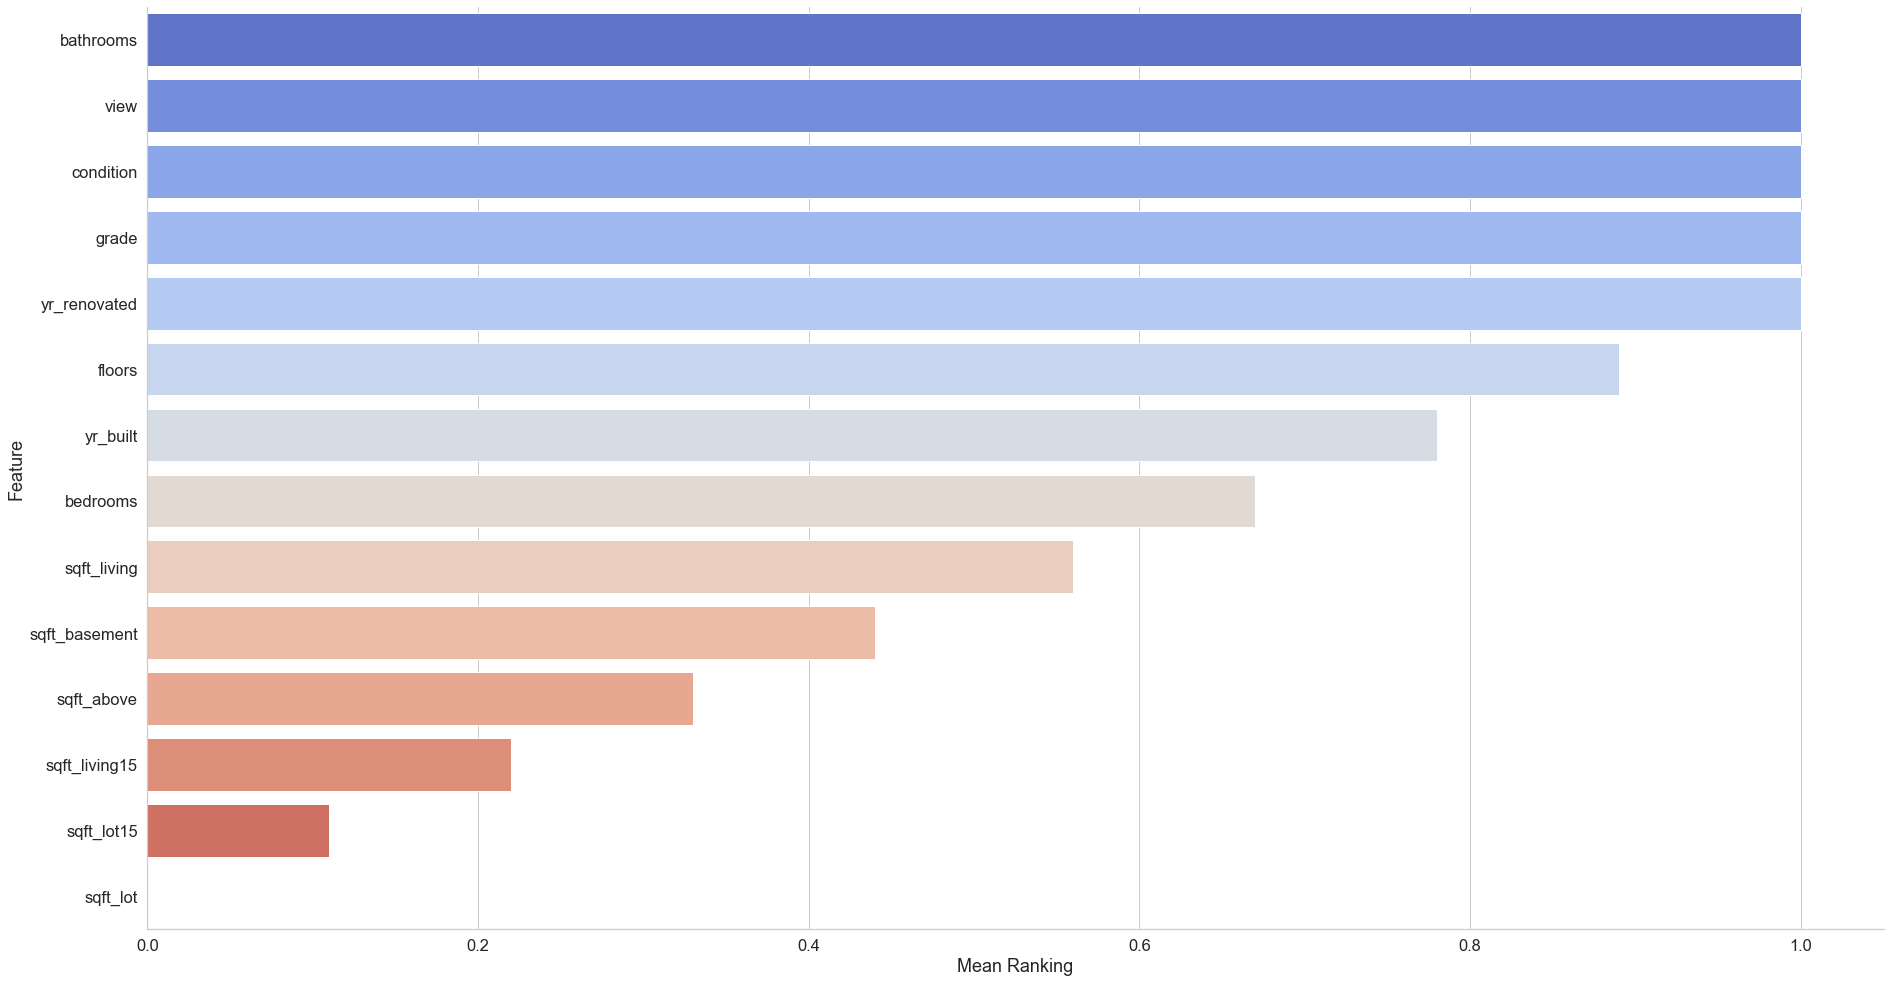

In [19]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=14, aspect=1.9, palette='coolwarm')